In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'archive\twitter_training.csv', header=None)
df.columns = ["ID", "Game", "Sentiment", "Tweet"]
df.head()

,ID,Game,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [35]:
df.shape

(74682, 4)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Game       74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [37]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

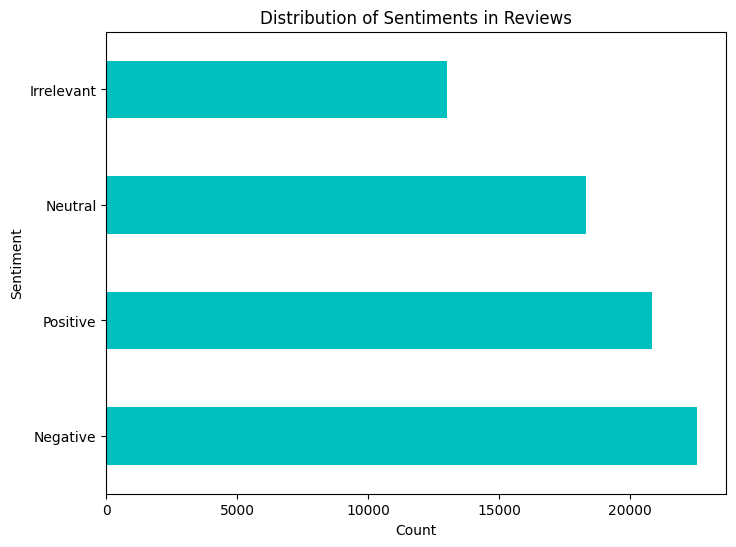

In [38]:
plt.figure(figsize=(8, 6))
df["Sentiment"].value_counts().plot(kind='barh', color='c')
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.title("Distribution of Sentiments in Reviews")
plt.show()

In [40]:
game_types = df['Game'].value_counts()
game_types

Game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

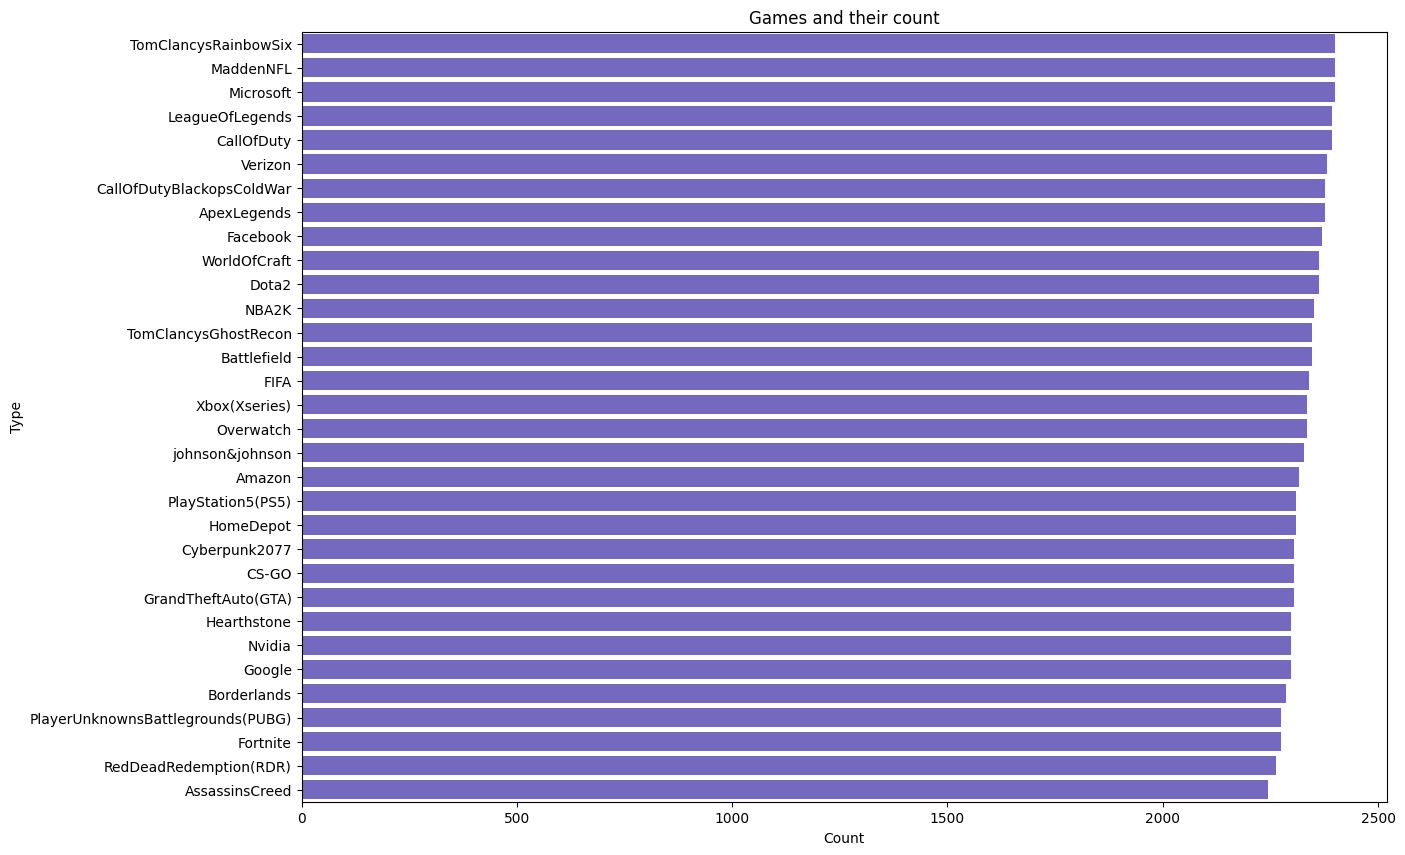

In [57]:
plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index,color='slateblue')  
plt.title('Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

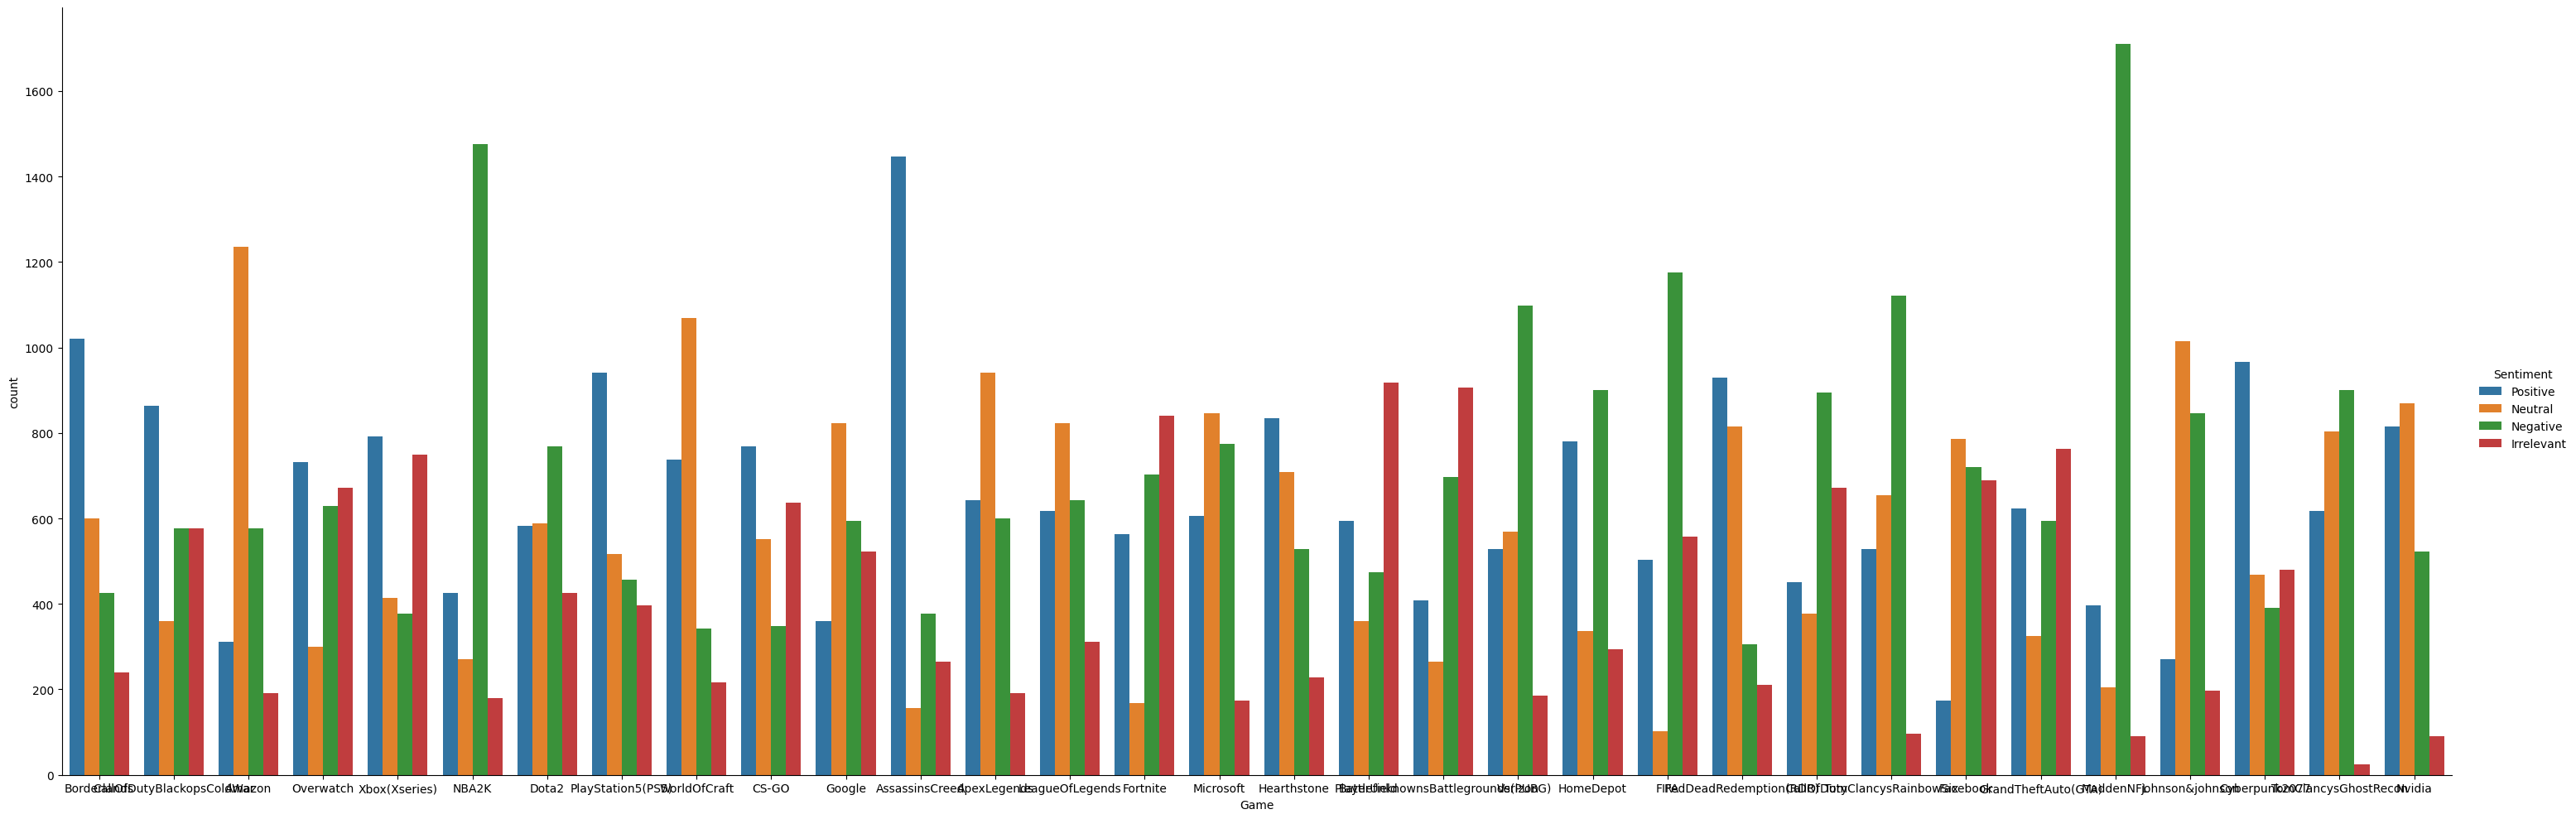

In [69]:
sns.catplot(x="Game",hue="Sentiment", kind="count",height=10,aspect=3, data=df)

In [71]:
total_null=df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  74682


,Total Missing,In Percent
Tweet,686,0.92
ID,0,0.00
Game,0,0.00
Sentiment,0,0.00


In [73]:
df.dropna(subset=['Tweet'],inplace=True)

total_null=df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  73996


,Total Missing,In Percent
ID,0,0.0
Game,0,0.0
Sentiment,0,0.0
Tweet,0,0.0


In [75]:
train0=df[df['Sentiment']=="Negative"]
train1=df[df['Sentiment']=="Positive"]
train2=df[df['Sentiment']=="Irrelevant"]
train3=df[df['Sentiment']=="Neutral"]

In [76]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20655, 4), (12875, 4), (18108, 4))

In [77]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [78]:
train0.shape, train1.shape, train2.shape, train3.shape

((1863, 4), (1721, 4), (1072, 4), (1509, 4))

In [147]:
data=pd.concat([train0,train1,train2,train3],axis=0)
data

,ID,Game,Sentiment,Tweet
24,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
27,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
28,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
5604,165,Amazon,Neutral,An amazing read aloud book for you and your ch...
5605,165,Amazon,Neutral,An amazing reading book for you and your child...
5606,165,Amazon,Neutral,An amazing book to read aloud for you and your...
5607,165,Amazon,Neutral,An amazing read aloud book for you and your ch...


In [85]:
id_types = data['ID'].value_counts()
id_types

ID
2405    6
1810    6
1748    6
1754    6
1760    6
       ..
134     3
1880    3
333     3
9388    2
9267    2
Name: count, Length: 1040, dtype: int64

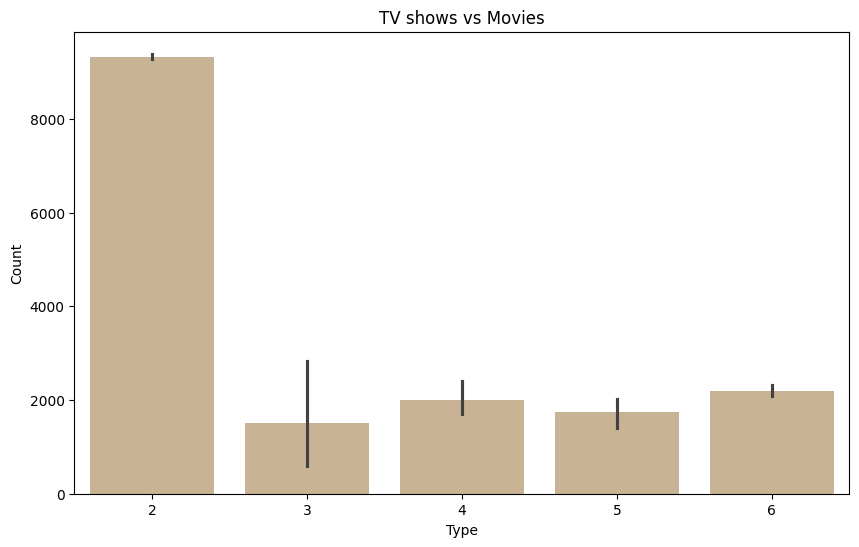

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(x=id_types.values,y=id_types.index,color='tan')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('TV shows vs Movies')
plt.show()

In [93]:
game_types = data['Game'].value_counts()
game_types

Game
Borderlands                  2280
CallOfDutyBlackopsColdWar    2191
Amazon                       1321
Overwatch                     373
Name: count, dtype: int64

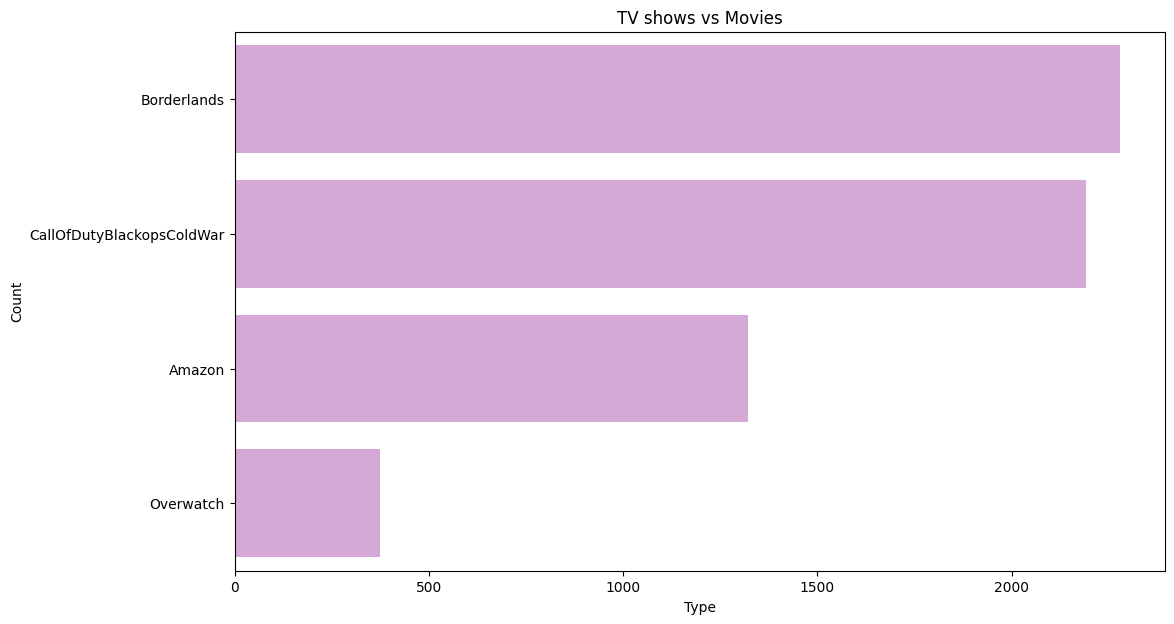

In [110]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index,color='plum')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('TV shows vs Movies')
plt.show()

In [111]:
sentiment_types = data['Sentiment'].value_counts()
sentiment_types

Sentiment
Negative      1863
Positive      1721
Neutral       1509
Irrelevant    1072
Name: count, dtype: int64

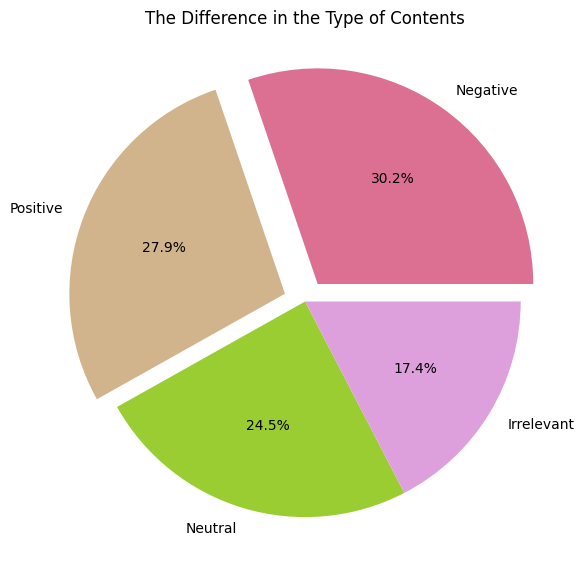

In [118]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0],colors=['palevioletred','tan','yellowgreen','plum'])
plt.title('The Difference in the Type of Contents')
plt.show()

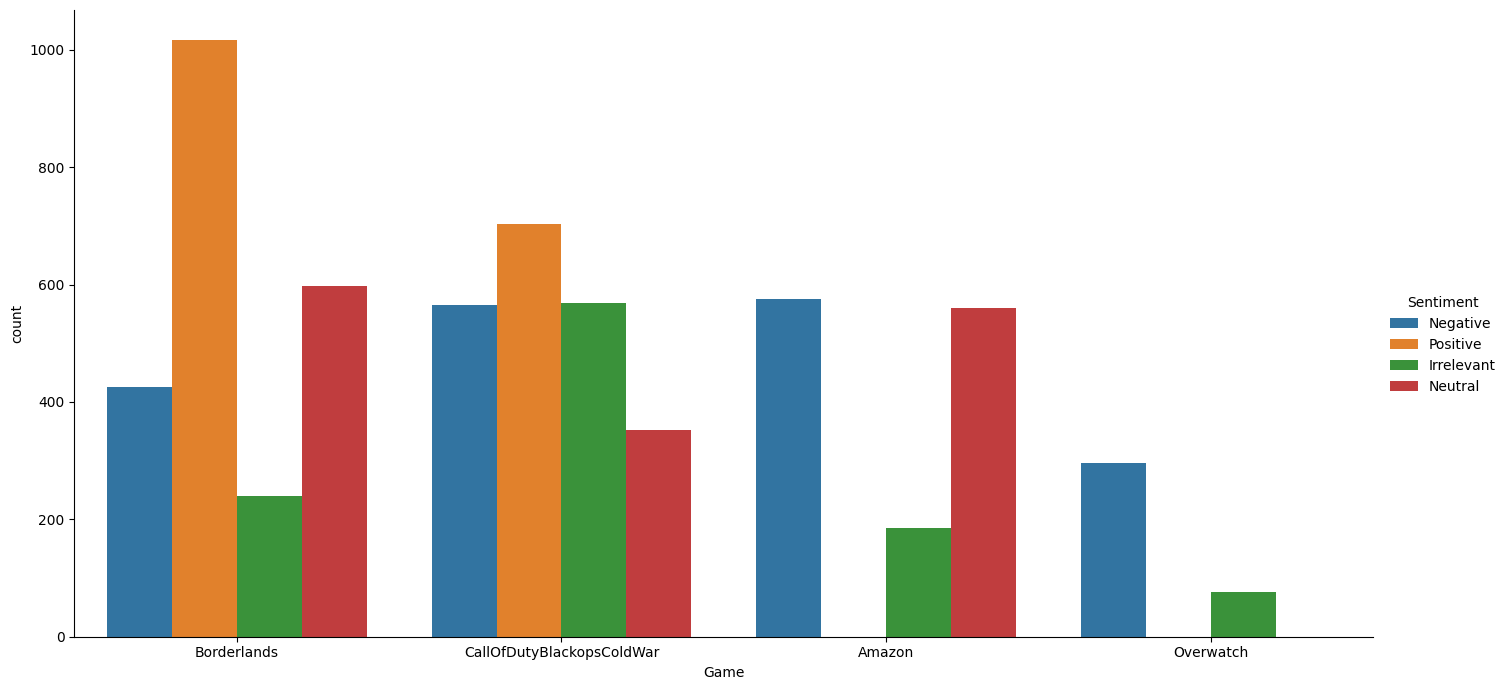

In [121]:
sns.catplot(x='Game',hue='Sentiment',kind='count',height=7,aspect=2,data=data)
plt.show()

In [145]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
v_data=pd.read_csv(r'archive\twitter_validation.csv', header=None)
v_data.columns = ["ID", "Game", "Sentiment", "Tweet"]
v_data

,ID,Game,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [143]:
data['Sentiment']=label_encoder.fit_transform(data['Sentiment'])
data['Game']=label_encoder.fit_transform(data['Game'])
v_data['Sentiment']=label_encoder.fit_transform(v_data['Sentiment'])
v_data['Game']=label_encoder.fit_transform(v_data['Game'])

In [148]:
data = data.drop(['ID'],axis=1)
data

,Game,Sentiment,Tweet
24,Borderlands,Negative,the biggest dissappoinment in my life came out...
25,Borderlands,Negative,The biggest disappointment of my life came a y...
26,Borderlands,Negative,The biggest disappointment of my life came a y...
27,Borderlands,Negative,the biggest dissappoinment in my life coming o...
28,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...
5604,Amazon,Neutral,An amazing read aloud book for you and your ch...
5605,Amazon,Neutral,An amazing reading book for you and your child...
5606,Amazon,Neutral,An amazing book to read aloud for you and your...
5607,Amazon,Neutral,An amazing read aloud book for you and your ch...


In [141]:
data.nunique()

Game            4
Sentiment       4
Tweet        5854
dtype: int64

In [142]:
v_data.nunique()

ID           1000
Game           32
Sentiment       4
Tweet         999
dtype: int64